# **Feature Engineering Notebook**

## Objectives

*   Engineer features for Classification, Regression and Cluster models


## Inputs

* inputs/datasets/cleaned/TrainSet.csv
* inputs/datasets/cleaned/TestSet.csv

## Outputs

* generate a list with variables to engineer

## Conclusions



* Feature Engineering Transformers
  * Ordinal categorical encoding: `['xxxxxxxxxxxxxfill in from the middle result', 'xxxxxxxxxxxxx', 'xxxxxxx']`
  * Smart Correlation Selection: `['xxxxxxxxxxxxxxxxxxx fill in from the bottom result', 'xxxxxxx', 'xxxxxxxx']`
  


---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/data-driven-design/jupyter_notebooks'

We want to make the parent of the current directory the new current directory.
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspace/data-driven-design'

---

# Load Feature Engineerd Data (from 4_feature_engineering_part_1)

Train Set

In [11]:
import pandas as pd
train_set_path = "outputs/datasets/feature_engineering/TrainSet.csv"
TrainSet = pd.read_csv(train_set_path)
TrainSet.head(3)

,Wing Span,Length,Height,Multi Engine,TP mods,Engine Type,AUW,MEW,FW,Vmax,...,Vstall,Range,Hmax,Hmax (One),ROC,ROC (One),Vlo,Slo,Vl,Sl
0,64.333333,68.416667,20.666667,0,0,2,48300.0,26985.0,20000.0,546.94,...,99.659388,4045.0,41000.0,20000.0,2512.569226,680.0,6969.145819,5684.0,3693.285251,2777.0
1,37.166667,31.166667,10.250000,0,0,0,5200.0,3229.0,964.8,220.00,...,59.000000,620.0,30000.0,18700.0,1530.000000,265.0,1250.000000,820.0,1250.000000,850.0
2,37.666667,25.583333,9.500000,0,0,0,4880.0,2960.0,750.4,200.00,...,66.000000,745.0,19200.0,7600.0,1630.000000,350.0,1700.000000,1255.0,1470.000000,1250.0


Test Set

In [12]:
test_set_path = 'outputs/datasets/feature_engineering/TestSet.csv'
TestSet = pd.read_csv(test_set_path)
TestSet.head(3)

,Wing Span,Length,Height,Multi Engine,TP mods,Engine Type,AUW,MEW,FW,Vmax,...,Vstall,Range,Hmax,Hmax (One),ROC,ROC (One),Vlo,Slo,Vl,Sl
0,32.750000,25.083333,6.500000,1,0,0,2650.0,1575.0,261.3,160.0,...,49.0,470.0,17100.0,17100.0,890.0,890.0,1515.0,1275.0,950.0,625.0
1,43.000000,30.083333,11.250000,1,0,1,4318.0,2900.0,1011.7,265.0,...,60.0,1000.0,27000.0,27000.0,3000.0,3000.0,1200.0,800.0,1000.0,800.0
2,44.083333,36.333333,11.416667,0,0,0,6850.0,4238.0,1427.1,230.0,...,68.0,875.0,26900.0,14800.0,1450.0,301.0,2195.0,1763.0,2485.0,1055.0


## Continuation of... "Dealing with Feature Engineering"

### Numerical Transformation

In [7]:
#Taken from above just to have the variables to copy from
variables_engineering= ['Wing Span', 'Length', 'Height', 'Multi Engine',
                        'AUW', 'MEW', 'FW', 'Vmax', 'Vcruise', 'Vstall',
                        'Range', 'Hmax', 'Hmax (One)', 'ROC', 'ROC (One)',
                        'Vlo', 'Slo', 'Vl', 'Sl']

* Step 1: Select variable(s)

In [8]:
variables_engineering = ['Wing Span', 'Length', 'Height', 'AUW', 'MEW',
                         'FW', 'Vmax', 'Vcruise', 'Vstall', 'Range', 
                         'Hmax', 'Hmax (One)', 'ROC', 'ROC (One)',
                         'Vlo', 'Slo', 'Vl', 'Sl']
variables_engineering

['Wing Span',
 'Length',
 'Height',
 'AUW',
 'MEW',
 'FW',
 'Vmax',
 'Vcruise',
 'Vstall',
 'Range',
 'Hmax',
 'Hmax (One)',
 'ROC',
 'ROC (One)',
 'Vlo',
 'Slo',
 'Vl',
 'Sl']

* Step 2: Create a separate DataFrame, with your variable(s)

In [9]:
df_engineering = TrainSet[variables_engineering].copy()
df_engineering.head(3)

,Wing Span,Length,Height,AUW,MEW,FW,Vmax,Vcruise,Vstall,Range,Hmax,Hmax (One),ROC,ROC (One),Vlo,Slo,Vl,Sl
0,32.750000,25.083333,6.500000,2650.0,1575.0,261.3,160.0,148.0,49.0,470.0,17100.0,17100.0,890.0,890.0,1515.0,1275.0,950.0,625.0
1,43.000000,30.083333,11.250000,4318.0,2900.0,1011.7,265.0,262.0,60.0,1000.0,27000.0,27000.0,3000.0,3000.0,1200.0,800.0,1000.0,800.0
2,44.083333,36.333333,11.416667,6850.0,4238.0,1427.1,230.0,213.0,68.0,875.0,26900.0,14800.0,1450.0,301.0,2195.0,1763.0,2485.0,1055.0


* Step 3: Create engineered variables(s) by applying the transformation(s), assess engineered variables distribution and select the most suitable method

In [10]:
df_engineering = FeatureEngineeringAnalysis(df=df_engineering, analysis_type='numerical')

NameError: name 'FeatureEngineeringAnalysis' is not defined

* For each variable, write your conclusion on how the transformation(s) look(s) to be effective
  * For all variables - it didn't improve the boxplot distribution or qq plot


* Step 4 - Apply the selected transformation to the Train and Test set

| Variable/Attribute | 'Sl_log_e' | 'Sl_log_10' | 'Sl_reciprocal' | 'Sl_power' | 'Sl_box_cox' | 'Sl_yeo_johnson' | 'Selected transformation' | 'Outliers' |
|--------------------|------------|-------------|-----------------|------------|--------------|------------------|---------------------------|------------|
|      Wing Span     |     ✗     |       ✗     |        ✓        |     ✗      |      ✓      |   ✓            |       'Sl_box_cox'        | 'Many' |
|       Length       |     ✗     |       ✗     |        ✓        |     ✗      |      ✓✓     |   ✓✓          |       'Sl_box_cox'        | 'Many' |
|       Height       |     ✗     |       ✗     |        ✓        |     ✗      |      ✓      |   ✓            |       'Sl_box_cox'        | 'Many' |
|        AUW         |     ✗     |       ✗     |        ✗        |     ✗      |      ✓      |   ✓            |       'Sl_box_cox'        | 'Many' |
|        MEW         |     ✗     |       ✗     |        ✗        |     ✗      |      ✓✓     |   ✓✓          |       'Sl_box_cox'        | 'Many' |
|        FW          |     ✗     |       ✗     |        ✗        |     ✗✗     |      ✓      |   ✓            |       'Sl_box_cox'        | 'Many' |
|       Vmax         |     ✗     |       ✗     |        ✗        |     ✗      |      ✓      |   ✓            |       'Sl_box_cox'        | 'Many' |
|      Vcruise       |     ✗     |       ✗     |        ✗        |     ✗      |      ✓      |   ✓            |       'Sl_box_cox'        | 'Many' |
|      Vstall        |     ✓     |       ✓     |        ✓        |     ✗       |      ✓✓    |   ✓✓           |       'Sl_box_cox'        | 'Many' |
|       Range        |     ✓     |       ✓     |        ✗        |     ✗       |      ✓     |   ✓            |       'Sl_log_10'          | 'Many' |
|       Hmax         |     ✗     |       ✗     |        ✓✓       |     ✗      |      ✓✓     |   ✓✓          |       'Sl_box_cox'        | 'Few' |
|     Hmax (One)     |     ✗     |       ✗     |        ✗        |     ✓      |      ✓      |   ✓            |       'Sl_box_cox'        | 'Many' |
|       ROC          |     ✗     |       ✗     |        ✗        |     ✗      |      ✓      |   ✓            |       'Sl_box_cox'        | 'Many' |
|     ROC (One)      |     ✗     |       ✗     |        ✗        |     ✗      |      ✓      |   ✓            |       'Sl_box_cox'        | 'Many' |
|       Vlo          |     ✗     |       ✗     |        ✗        |     ✗      |      ✓      |   ✓            |       'Sl_box_cox'        | 'Many' |
|       Slo          |     ✗     |       ✗     |        ✗        |     ✗      |      ✗      |   ✗            |       'Sl_box_cox'        | 'Many' |
|       Vl           |     ✗     |       ✗     |        ✗        |     ✓✓      |      ✓✓    |   ✓✓           |       'Sl_box_cox'        | 'Many' |
|       Sl           |     ✓     |       ✓     |        ✗        |     ✗       |      ✗      |   ✗            |       'Sl_log_10'        | 'Many' |

In [ ]:
# we are not applying any numerical transformation to the data

In [34]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_transform = ['Wing Span', 'Length', 'Height', 'AUW', 'MEW',
                         'FW', 'Vmax', 'Vcruise', 'Vstall', 'Range', 
                         'Hmax', 'Hmax (One)', 'ROC', 'ROC (One)',
                         'Vlo', 'Slo', 'Vl', 'Sl']

# Create a DataFrame to store differences
differences_df = pd.DataFrame()

for column in columns_to_transform:
    if column in df_engineering.columns:
        # Check for positive values for Box-Cox
        if (df_engineering[column] <= 0).any():
            # Use Yeo-Johnson for zero or negative values
            pt = PowerTransformer(method='yeo-johnson')
            transformed_values = pt.fit_transform(df_engineering[[column]])
            df_engineering[column] = transformed_values
            differences_df[column] = transformed_values.flatten() - original_df[column]  # Store differences
        else:
            # Use Box-Cox for positive values
            df_engineering[column], _ = stats.boxcox(df_engineering[column])
            differences_df[column] = df_engineering[column] - original_df[column]  # Store differences

# Summary statistics of the differences
differences_stats = differences_df.describe()
print("Differences Statistics:\n", differences_stats)

# Plotting differences
for column in columns_to_transform:
    plt.figure(figsize=(8, 4))
    sns.histplot(differences_df[column], bins=30, kde=True)
    plt.title(f'Differences for {column}')
    plt.axvline(0, color='red', linestyle='--')  # Line at 0 for reference
    plt.show()


NameError: name 'original_df' is not defined

Differences Statistics:
           Wing Span        Length        Height           AUW           MEW  \
count  6.850000e+02  6.850000e+02  6.850000e+02  6.850000e+02  6.850000e+02   
mean   3.502369e-18  1.397787e-15 -1.724087e-16  8.910289e-15 -4.560894e-15   
std    4.597191e-04  1.703030e-02  2.246477e-03  7.548666e-03  6.258238e-03   
min   -8.106890e-03 -1.130297e-01 -1.251012e-02 -4.667211e-02 -3.004155e-02   
25%   -5.091619e-05 -7.984192e-03 -8.557370e-04 -2.364495e-03 -2.090839e-03   
50%    1.528174e-04  6.563558e-03  8.131602e-04  2.930098e-03  2.136074e-03   
75%    2.044580e-04  1.274775e-02  1.737252e-03  5.536224e-03  4.588761e-03   
max    2.439066e-04  1.553571e-02  2.143705e-03  6.831674e-03  5.707172e-03   

                 FW          Vmax       Vcruise        Vstall       Range  \
count  6.850000e+02  6.850000e+02  6.850000e+02  6.850000e+02  685.000000   
mean   1.365493e-17 -1.907908e-14  9.828006e-16 -1.185183e-17    0.012149   
std    1.543608e-02  5.690996e-0

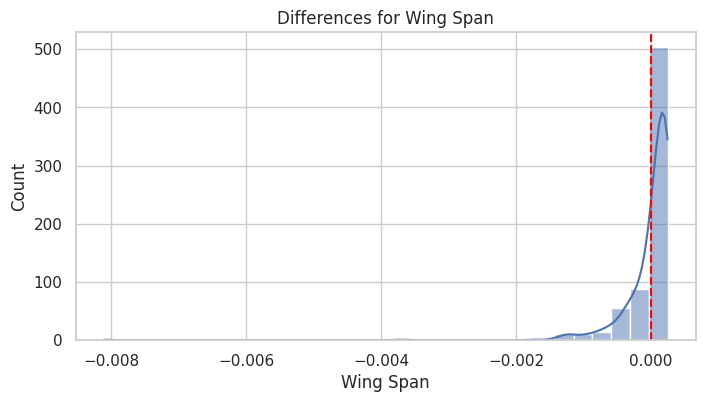

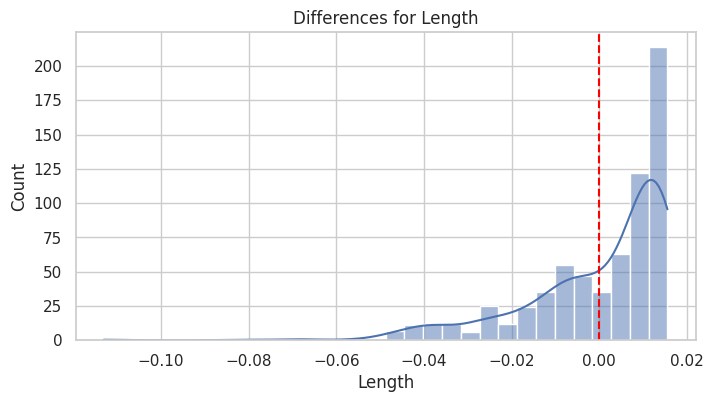

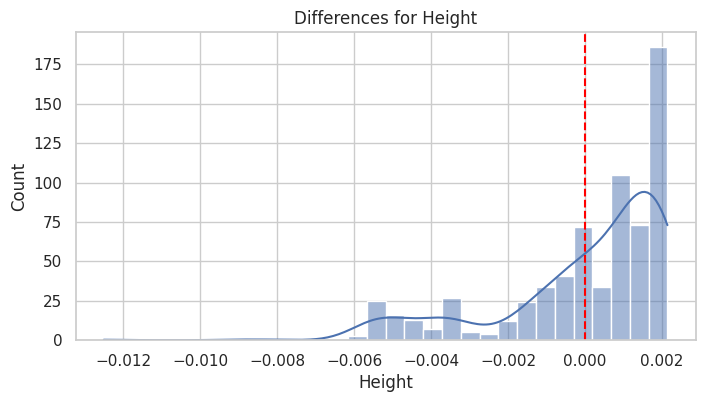

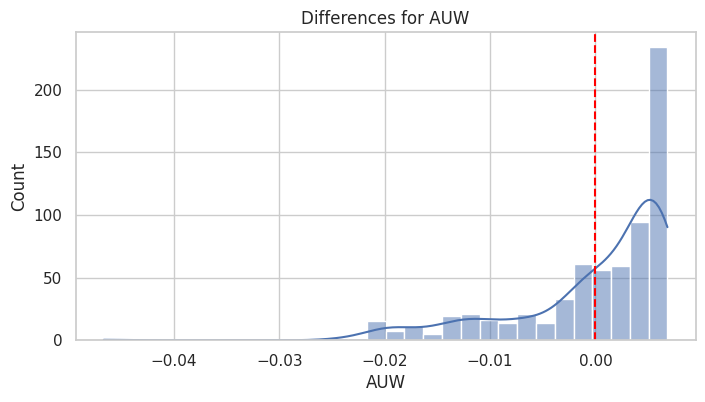

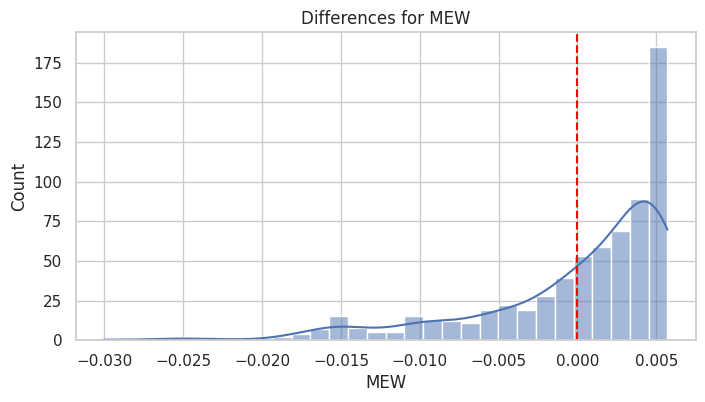

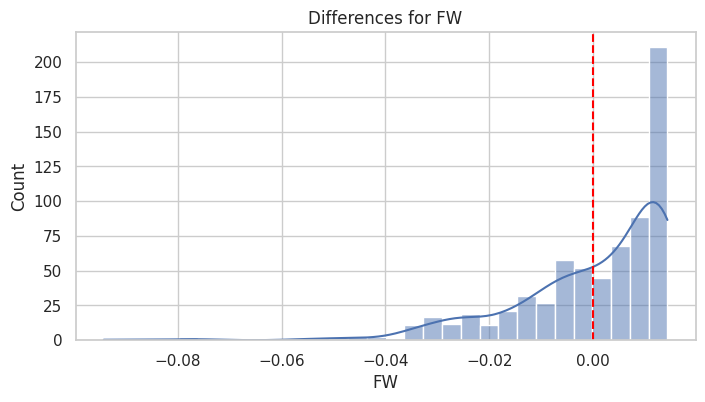

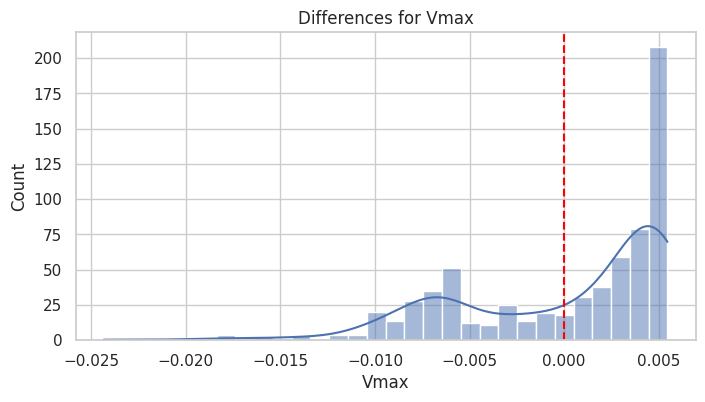

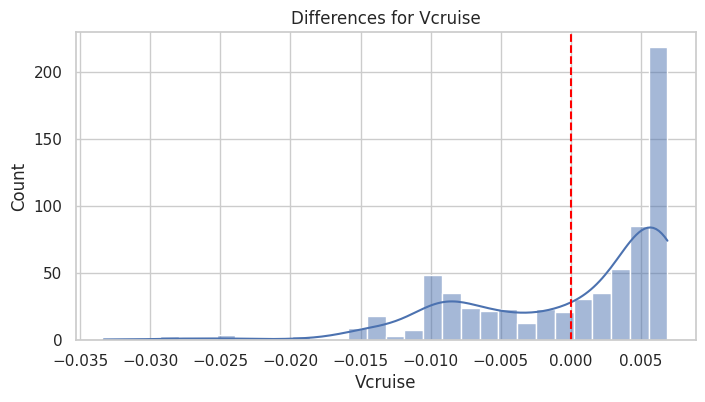

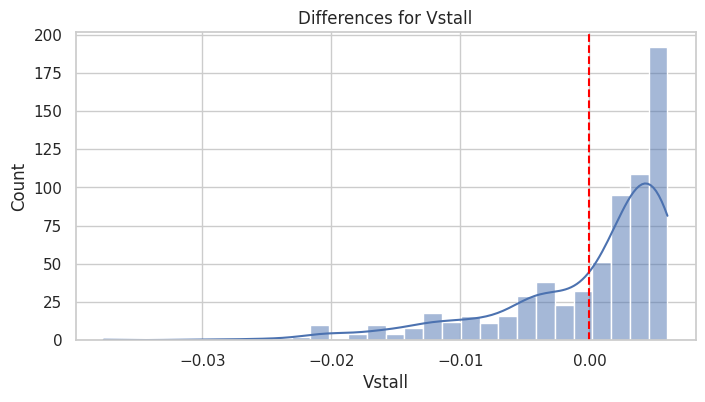

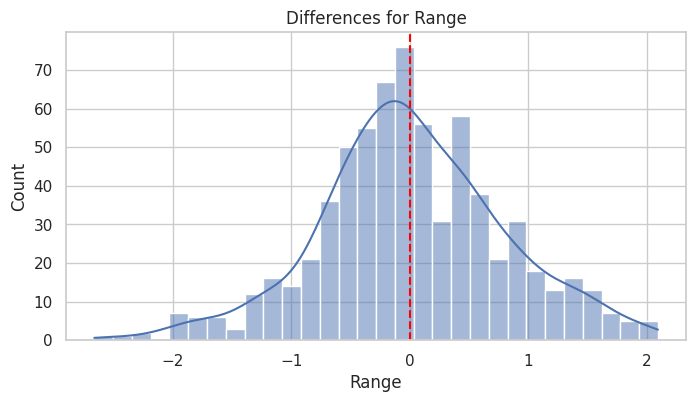

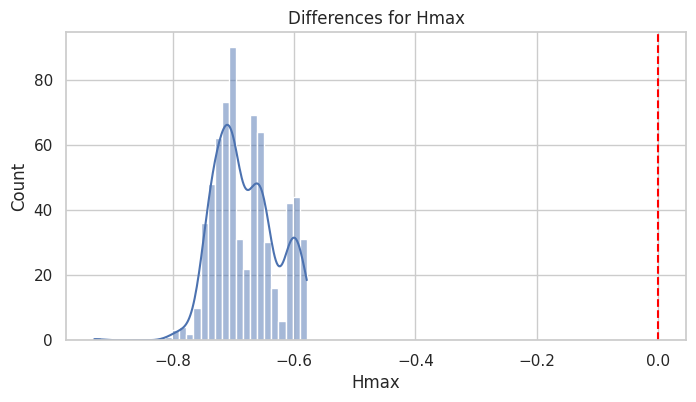

KeyboardInterrupt: 

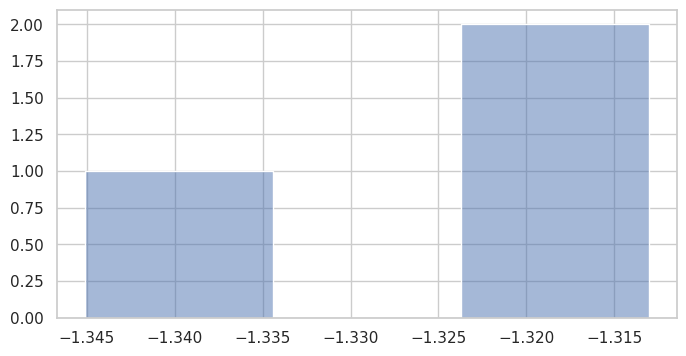

In [42]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_engineering is your DataFrame
# df_engineering = pd.DataFrame(...)  # Load your DataFrame here

# List of columns to apply transformations
columns_to_transform = ['Wing Span', 'Length', 'Height', 'AUW', 'MEW',
                        'FW', 'Vmax', 'Vcruise', 'Vstall', 'Range', 
                        'Hmax', 'Hmax (One)', 'ROC', 'ROC (One)',
                        'Vlo', 'Slo', 'Vl', 'Sl']

# Create a DataFrame to store transformed values
df_engineering_transformed = pd.DataFrame()

# Store the original DataFrame for difference calculation
original_df = df_engineering.copy()

# Apply transformations
for column in columns_to_transform:
    if column in df_engineering.columns:
        # Check for positive values for Box-Cox
        if (df_engineering[column] <= 0).any():
            # Use Yeo-Johnson for zero or negative values
            pt = PowerTransformer(method='yeo-johnson')
            transformed_values = pt.fit_transform(df_engineering[[column]])
            df_engineering_transformed[column] = transformed_values.flatten()  # Store transformed values
        else:
            # Use Box-Cox for positive values
            transformed_values, _ = stats.boxcox(df_engineering[column])
            df_engineering_transformed[column] = transformed_values  # Store transformed values

# Calculate differences
differences_df = df_engineering_transformed - original_df[columns_to_transform]

# Summary statistics of the differences
differences_stats = differences_df.describe()
print("Differences Statistics:\n", differences_stats)

# Plotting differences
for column in columns_to_transform:
    plt.figure(figsize=(8, 4))
    sns.histplot(differences_df[column], bins=30, kde=True)
    plt.title(f'Differences for {column}')
    plt.axvline(0, color='red', linestyle='--')  # Line at 0 for reference
    plt.show()


In [41]:
import pandas as pd
import numpy as np
from scipy import stats

# List of columns to apply Box-Cox transformation
columns_to_transform = ['Wing Span', 'Length', 'Height', 'AUW', 'MEW',
                         'FW', 'Vmax', 'Vcruise', 'Vstall', 'Range', 
                         'Hmax', 'Hmax (One)', 'ROC', 'ROC (One)',
                         'Vlo', 'Slo', 'Vl', 'Sl']


# Apply Box-Cox transformation
for column in columns_to_transform:
    # Check if the column exists and contains positive values for Box-Cox
    if column in df_engineering.columns:
        # Ensure all values are positive
        if (df_engineering[column] <= 0).any():
            # Use Yeo-Johnson for zero or negative values
            pt = PowerTransformer(method='yeo-johnson')
            transformed_values = pt.fit_transform(df_engineering[[column]])
            df_engineering_transformed[column] = transformed_values
        else:
            df_engineering_transformed[column], _ = stats.boxcox(df_engineering[column])


NameError: name 'df_engineering_transformed' is not defined

In [36]:
# Summary statistics before transformation
original_stats = df_engineering[columns_to_transform].describe()

# Summary statistics after transformation
transformed_stats = df_engineering[columns_to_transform].describe()

# print("Original Statistics:\n", original_stats)
# print("Transformed Statistics:\n", transformed_stats)

# Create a DataFrame to store differences
differences_df = pd.DataFrame()

for column in columns_to_transform:
    if column in df_engineering.columns:
        differences_transformed_df[column] = df_engineering[column] - df_engineering[column]  # Adjust this line
print("differences:\n", differences_df)


differences:
      Wing Span  Length  Height  AUW  MEW   FW  Vmax  Vcruise  Vstall  Range  \
0          0.0     0.0     0.0  0.0  0.0  0.0   0.0      0.0     0.0    0.0   
1          0.0     0.0     0.0  0.0  0.0  0.0   0.0      0.0     0.0    0.0   
2          0.0     0.0     0.0  0.0  0.0  0.0   0.0      0.0     0.0    0.0   
3          0.0     0.0     0.0  0.0  0.0  0.0   0.0      0.0     0.0    0.0   
4          0.0     0.0     0.0  0.0  0.0  0.0   0.0      0.0     0.0    0.0   
..         ...     ...     ...  ...  ...  ...   ...      ...     ...    ...   
680        0.0     0.0     0.0  0.0  0.0  0.0   0.0      0.0     0.0    0.0   
681        0.0     0.0     0.0  0.0  0.0  0.0   0.0      0.0     0.0    0.0   
682        0.0     0.0     0.0  0.0  0.0  0.0   0.0      0.0     0.0    0.0   
683        0.0     0.0     0.0  0.0  0.0  0.0   0.0      0.0     0.0    0.0   
684        0.0     0.0     0.0  0.0  0.0  0.0   0.0      0.0     0.0    0.0   

     Hmax  Hmax (One)  ROC  ROC (One)

### SmartCorrelatedSelection Variables

* Step 1: Select variable(s)

In [ ]:
# for this transformer, you don't need to select variables, since you need all variables for this transformer

* Step 2: Create a separate DataFrame, with your variable(s)

In [ ]:
df_engineering = TrainSet.copy()
df_engineering.head(3)

* Step 3: Create engineered variables(s) applying the transformation(s)

In [ ]:
from feature_engine.selection import SmartCorrelatedSelection
corr_sel = SmartCorrelatedSelection(variables=None, method="spearman", threshold=0.6, selection_method="variance")

corr_sel.fit_transform(df_engineering)
corr_sel.correlated_feature_sets_

In [ ]:
corr_sel.features_to_drop_

---

# So what is the conclusion? :)


The list below shows the transformations needed for feature engineering.
  * You will add these steps to the ML Pipeline


Feature Engineering Transformers
  * Ordinal categorical encoding: `['gender', 'Partner', Dependents', 'PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']`
  * Smart Correlation Selection: `['OnlineSecurity', 'DeviceProtection', 'TechSupport']`
  

* Well done! Clear the outputs, and move on to the following notebook.